#<a href="https://competitions.codalab.org/competitions/15587?secret_key=135de508-0697-4c8a-8811-a611ee9ac039">Cyan Team - Age prediction from a single image</a>

<i> Brought to you by Cyan team</i>

ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 

## Introduction

The Lothlorian dataset is binary classification data set, which detects the user age being over or under age 18.

- lothlorian_train.data - a file in format libswm, which contains the features extracted from each image in the WIKI-IMDB dataset. We used a pre trained CNN to extract 4096 features for each of the (nr_of_images) images.
- lothlorian_feat.name - a file of feature names.
- lothlorian_label.name - a file of label names (0 or 1).
- lothlorian_train.solution - a file with 2 columns, which contains the class of each input image ( minor or major)
- lothlorian_test.data - a file in format libswm for testing.

In [1]:
codedir = 'sample_code/'                        # Change this to the directory where you put the code
from sys import path; path.append(codedir)
import pandas as pd
%matplotlib inline
import seaborn as sns; sns.set() #http://seaborn.pydata.org/ - Seaborn is a Python visualization library based on matplotlib.

## Fetch the data and load it

In [2]:
datadir = 'public_data/'                        # Change this to the directory where you put the input data
dataname = 'lothlorian'
basename = datadir  + dataname
!ls $basename*

public_data/lothlorian_feat.name      public_data/lothlorian_train.data
public_data/lothlorian_label.name     public_data/lothlorian_train.solution
public_data/lothlorian_test.data      public_data/lothlorian_valid.data


In [19]:
import data_io
reload(data_io)
data = data_io.read_as_df(basename)                          # The data are loaded as a Pandas Data Frame
#data.to_csv(basename + '_train.csv', index=False)           # This allows saving the data in csv format

Reading public_data/lothlorian_train from AutoML format
Number of examples = 17724
Number of features = 4096
Number of classes = 2


In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,1.268251,0.0,2.106965,0,0,0.000000,0.0,10.603186,8.476866,0.0,...,0.000000,0,0,0.000000,4.096412,0.000000,2.956319,0.0,0.0,1
1,0.000000,0.0,0.000000,0,0,0.000000,0.0,0.000000,5.064308,0.0,...,11.635319,0,0,21.763811,14.241759,0.000000,0.563878,0.0,0.0,1
2,0.000000,0.0,0.000000,0,0,2.870368,0.0,0.000000,0.000000,0.0,...,10.478777,0,0,0.000000,0.000000,4.432796,7.262613,0.0,0.0,0
3,0.000000,0.0,4.973673,0,0,2.701038,0.0,1.756998,0.000000,0.0,...,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1
4,0.000000,0.0,0.418692,0,0,0.000000,0.0,0.000000,0.000000,0.0,...,41.546066,0,0,5.577128,2.721869,2.348195,0.000000,0.0,0.0,0


In [57]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
count,17724.000000,17724.0,17724.000000,17724.0,17724.0,17724.000000,17724.0,17724.000000,17724.000000,17724.000000,...,17724.000000,17724.0,17724.0,17724.000000,17724.000000,17724.000000,17724.000000,17724.000000,17724.0,17724.000000
mean,0.507281,0.0,4.211270,0.0,0.0,3.870780,0.0,5.027073,4.468565,1.570928,...,14.196806,0.0,0.0,5.959424,7.294247,2.594675,3.084003,6.917338,0.0,0.564489
std,0.912516,0.0,7.833106,0.0,0.0,7.875163,0.0,9.537904,8.760607,4.761275,...,13.623651,0.0,0.0,10.270545,12.188976,7.214320,5.894969,11.321452,0.0,0.495838
min,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.297242,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,11.861785,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,0.695036,0.0,5.620453,0.0,0.0,4.070446,0.0,6.419878,5.386473,0.000000,...,22.499348,0.0,0.0,8.999274,11.057065,0.000000,3.880413,10.506353,0.0,1.000000
max,7.838392,0.0,59.143669,0.0,0.0,62.545124,0.0,87.302124,95.644180,61.088356,...,87.668259,0.0,0.0,85.350090,91.528587,72.522858,51.954559,97.367935,0.0,1.000000


Is the dataset unbalanced ?


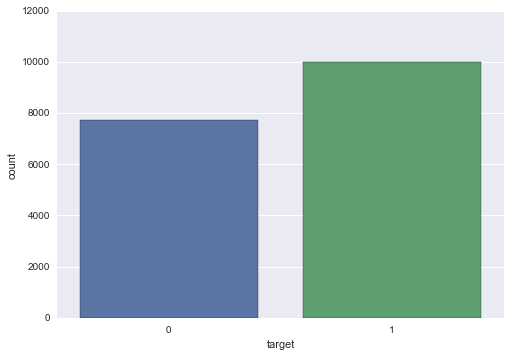

In [50]:
print 'Is the dataset unbalanced ?'

sns.set(style="darkgrid")
sns.countplot(x="target", data=data)

Features are ranging from 0.0 to 142.316833496
Are there any features having no values ?, Should you remove them ?
Differences between somes features:


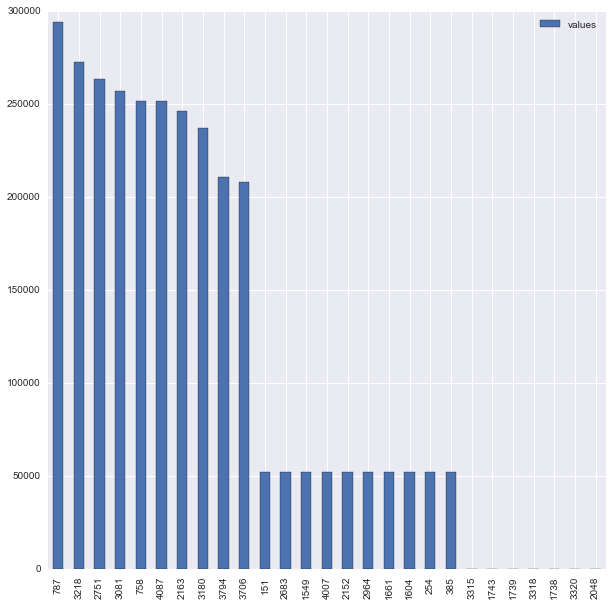

In [7]:
data = pd.DataFrame(data)
features = pd.DataFrame(data.sum())
features.columns = ['values']

print 'Features are ranging from ' + str(data.min().min()) +' to ' + str(data.max().max())
print 'Are there any features having no values ?, Should you remove them ?'
print 'Differences between somes features:'

featuresSorted = features.sort_values('values', ascending=False)

#Modify the line below to see the visualization of other features ?
featuresSorted = pd.concat([featuresSorted[0:10], featuresSorted[2000:2010], featuresSorted[4090:4097]])
featuresSorted.plot(kind='bar', figsize=(10,10))


By using ExtraTreesClassifier, how are good features found ?
Is this dataset clearly separable ? 
Top 16 of Good Features: [79, 302, 442, 485, 880, 1065, 1353, 1840, 2147, 2623, 2662, 2739, 3043, 3105, 3567, 3797]


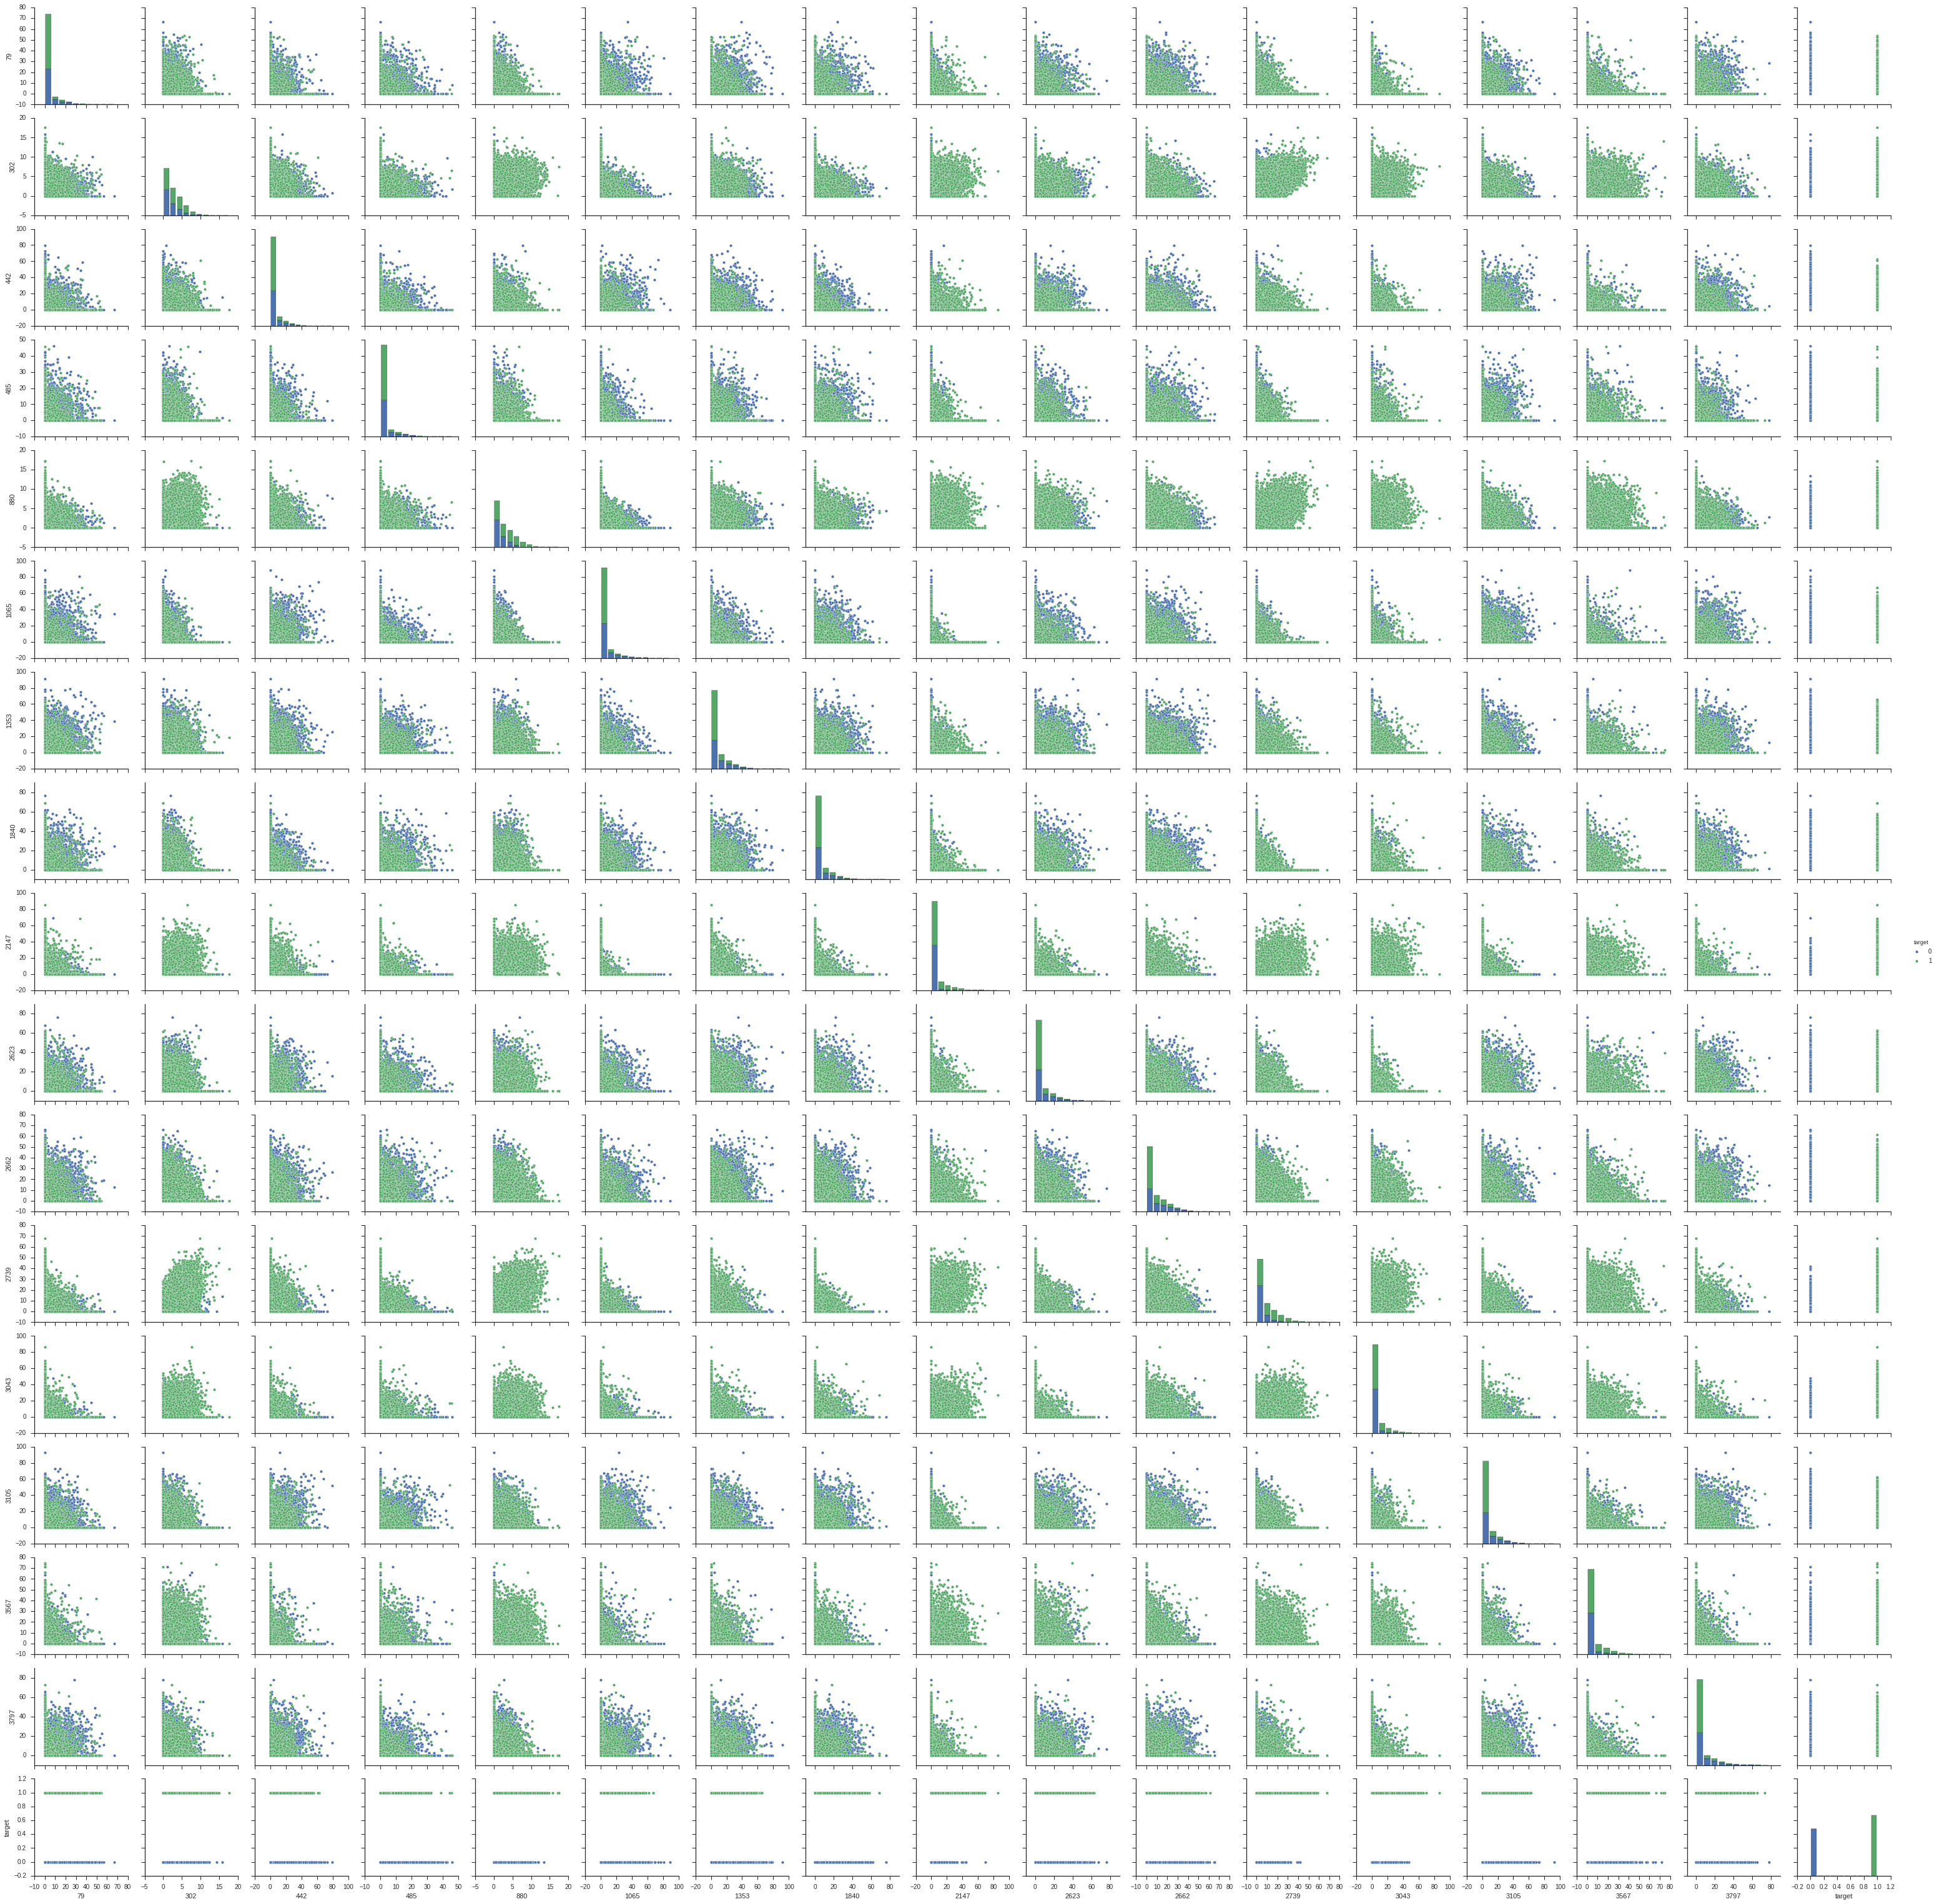

In [9]:
print 'By using ExtraTreesClassifier, how are good features found ?'
print 'Is this dataset clearly separable ? '

from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
X_train = data.drop('target', axis=1).values   
y_train = data['target'].values

goodFeatures = []

model = ExtraTreesClassifier()
model.fit(X_train, y_train)

features = model.feature_importances_

featuresThreshold = 15 #This threshold modifies number of good features. 
for feature in range(len(features)):
    if(features[feature] > np.mean(features)*featuresThreshold):
        goodFeatures.append(feature)
        
print 'Top '+ str(len(goodFeatures))+ ' of Good Features: ' + str(goodFeatures)

sns.set(style="ticks", color_codes=True)
sns.pairplot(data[data.columns[goodFeatures + [4096]]], hue='target')



## Building a predictive model

Data matrices for training and making predictions.

In [5]:
X_train = data.drop('target', axis=1).values            # This is the data matrix you already loaded (training data)
y_train = data['target'].values                         # These are the target values encoded as categorical variables
print 'Dimensions X_train=', X_train.shape, 'y_train=', y_train.shape
X_valid = data_io.read_as_df(basename, 'valid').values
X_test = data_io.read_as_df(basename, 'test').values

Dimensions X_train= (17724, 4096) y_train= (17724,)
Reading public_data/lothlorian_valid from Libsvm format
Number of examples = 13294
Number of features = 4096
Reading public_data/lothlorian_test from Libsvm format
Number of examples = 13294
Number of features = 4096


The initial classifier in your starting kit (in the sample_code directory).

In [6]:
import classifier
reload(classifier)                               # If you make changes to your code you have to reload it
from classifier import Classifier
Classifier??

Train, run, and save your classifier and your predictions. If you saved a trained model and/or prediction results, the evaluation script will look for those and use those in priority [(1) use saved predictions; (2) if no predictions, use saved model, do not retrain, just test; (3) if neither, train and test model from scratch]. Compute the predictions with predict_proba, this is more versatile.

In [7]:
import libscores
from libscores import binarize_predictions 
result_dir = 'res/'
outname = result_dir + dataname
clf = Classifier()
clf.fit(X_train, y_train)

Y_valid = clf.predict_proba(X_valid)
Y_test = clf.predict_proba(X_test)

Y_valid = binarize_predictions(Y_valid, task='binary.classification')
Y_test = binarize_predictions(Y_test, task='binary.classification')

clf.save(outname)

#clf.load(outname) # Uncomment to check reloading works
data_io.write(outname + '_valid.predict', Y_valid)
data_io.write(outname + '_test.predict', Y_test)
!ls $outname*

/Users/macbook975/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/macbook975/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/macbook975/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/macbook975/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 

res/lothlorian_model.pickle  res/lothlorian_valid.predict
res/lothlorian_test.predict


Compute the training accuracy.

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Directly predicts the (categorical) class labels
y_predict = clf.predict(X_train)
print 'Training accuracy = ', accuracy_score(y_train, y_predict)
class_labels = clf.get_classes()     
print 'Class labels=', class_labels

confusion_matrix = confusion_matrix(y_train, y_predict, class_labels)
print 'Confusion matrix [known in lines, predicted in columns]=\n', confusion_matrix

balance_classification_rate = 1/2 * ( float(confusion_matrix[1,1])/float(confusion_matrix[0,1] + confusion_matrix[1,1]) ) + ( float(confusion_matrix[0,0])/float(confusion_matrix[0,0] + confusion_matrix[1,0]))                              
print 'Balance Classification Rate = ', balance_classification_rate


Training accuracy =  0.855337395622
Class labels= [0 1]
Confusion matrix [known in lines, predicted in columns]=
[[6600 1119]
 [1445 8560]]
Balance Classification Rate =  0.855033035367


Compute cross-validation accuracy. This is usually worse than the training accuracy. Notice that we internally split the training data into training and validation set (this is because we do NOT have the labels of X_valid and X_test).

In [9]:
from sklearn.cross_validation import StratifiedShuffleSplit
# This is just an example of k-fold cross-validation
skf = StratifiedShuffleSplit(y_train, n_iter=5, test_size=0.5, random_state=61)
i=0
for idx_t, idx_v in skf:
    i=i+1
    Xtr = X_train[idx_t]
    Ytr = y_train[idx_t]
    Xva = X_train[idx_v]
    Yva = y_train[idx_v]
    clf = Classifier()
    clf.fit(Xtr, Ytr)
    Y_predict = clf.predict(Xva)
    print 'Fold', i, 'validation accuracy = ', accuracy_score(Y_predict, Yva)

/Users/macbook975/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/macbook975/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/macbook975/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarni

Fold 1 validation accuracy =  0.735274204469


/Users/macbook975/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/macbook975/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/macbook975/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/macbook975/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 

Fold 2 validation accuracy =  0.737192507335


/Users/macbook975/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/macbook975/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/macbook975/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/macbook975/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 

Fold 3 validation accuracy =  0.741819002483


/Users/macbook975/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/macbook975/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/macbook975/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/macbook975/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 

Fold 4 validation accuracy =  0.739787858271


/Users/macbook975/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/macbook975/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/macbook975/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/macbook975/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 

Fold 5 validation accuracy =  0.738095238095


In [10]:
import libscores
 
# We use binary classification!
Y_train, C = libscores.onehot(y_train)                                   
print 'Dimensions Y_train=', Y_train.shape, 'Class labels=', C
assert((class_labels==C).all()) # Just to make sure the labels of the classifier are in the right order
# Note: if all went well, you should recover public_data/lothlorian_train.solution
# You had it all along, but to show you some nice plots we loaded the data as a data frame so we lost it!

from libscores import bac_metric 
from libscores import auc_metric 
from libscores import f1_metric 
from libscores import binarize_predictions 
# Predicts probabilities, a matrix patnum x classnum 
# As solution, you must use Y_train, not y_train
y_predict_proba = clf.predict_proba(X_train)

y_predict = binarize_predictions(y_predict_proba, task='binary.classification')

print 'Training balanced accuracy = ', bac_metric(Y_train, y_predict, task='binary.classification')
print 'Training AUC = ', auc_metric(Y_train, y_predict, task='binary.classification')
print 'Training F1 measure = ', f1_metric(Y_train, y_predict, task='binary.classification')

Dimensions Y_train= (17724, 2) Class labels= [0 1]
Training balanced accuracy =  0.644015924412
Training AUC =  0.644015924412
Training F1 measure =  0.64520087854


## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>classifier.py</code> in the <code>sample_code/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission.  The program looks for saved results and saved models in the subdirectory <code>res/</code>. If it finds them, it will use them: (1) If results are found, then are copied to the output directory; (2) If no results but a trained model is found, it is reloaded and no training occurs; (3) If nothing is found a fresh model is trained and tested.

In [20]:
outdir = 'outputs'         # If you use result_dir as output directory, your submission will include your results

In [22]:
!python run.py $datadir $outdir

Using input_dir: public_data/
Using output_dir: /Users/macbook975/Documents/Projet/Projet Challenge/Final/starting_kit/outputs
************************************************************************
****** Attempting to copy files (from res/) for RESULT submission ******
************************************************************************
[+] Lothlorian copied
[+] Results copied to output directory, no model trained/tested
========= Zipping this directory to prepare for submit ==============
resultonly
sauter public_data
See: ../sample_submission_17-01-16-15-51.zip
[+] Done
[+] Overall time spent  3.76 sec ::  Overall time budget  0.00 sec


## Making your submission

The test program <code>run.py</code> prepares your <code>zip</code> file, ready to go. You find it in the directory above where you ran your program. For large datasets, we recommend that <b><span style="color:red">you do NOT bundle the data with your submission</span></b>. The data directory is passed as an argument to run.py, and it is already there on the test server.